In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from PIL import Image

size = 100, 100

In [2]:
img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]

In [3]:
def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()
    
def plot_one_images(figure_title, image1, label1,image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)
    
    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)


    # Display the third image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

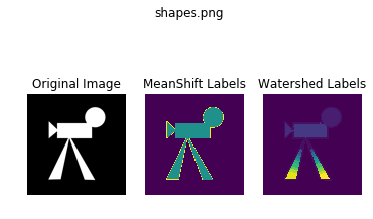

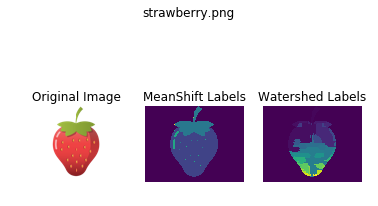

In [4]:
for img_path in images:
    img = Image.open(img_path)
    size_img = img.size
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_size = img.size
    #print(img_size)
    img_size = [img_size[1],img_size[0]]
    
    img_mat = np.array(img)[:, :, :3]
    
    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    redImg = img_mat[:, :, 2]
    redImg_f = redImg.flatten()
    greenImg = img_mat[:, :, 1]
    greenImg_f = greenImg.flatten()
    blueImg = img_mat[:, :, 0]
    blueImg_f = blueImg.flatten()
    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = np.array([redImg_f,greenImg_f,blueImg_f]).T

    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
    ms_labels = np.reshape(ms_labels, img_size)

    #%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_array = np.array(img.convert("L"))
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    #plt.imshow(distance)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    peak = peak_local_max(distance,indices=False,labels= img_array)
    markers = ndi.label(peak)[0]
    #print(markers)
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers,mask= img_array)

    # Display the results
    
    if img_path == "shapes.png":
        plt.imsave("shapes_w.jpg", ws_labels)
        plt.imsave("shapes_m.jpg", ms_labels)
        
    else:
        plt.imsave("strawberry_w.jpg", ws_labels)
        plt.imsave("strawberry_m.jpg", ms_labels)
        
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")

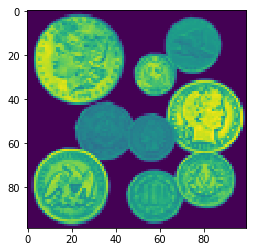

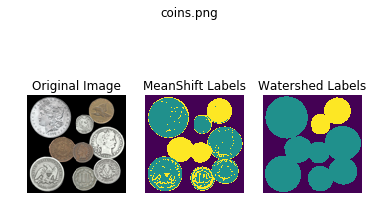

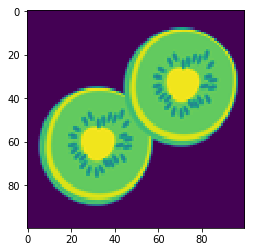

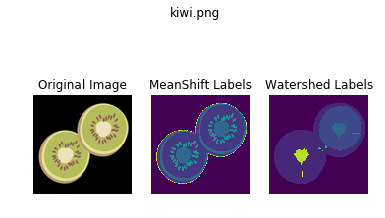

In [11]:
#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    size_img = img.size
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_size = img.size
    #print(img_size)
    img_size = [img_size[1],img_size[0]]
    
    img_mat = np.array(img)[:, :, :3]
    

    redImg = img_mat[:, :, 2]
    redImg_f = redImg.flatten()
    greenImg = img_mat[:, :, 1]
    greenImg_f = greenImg.flatten()
    blueImg = img_mat[:, :, 0]
    blueImg_f = blueImg.flatten()

    colour_samples = np.array([redImg_f,greenImg_f,blueImg_f]).T

    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    ms_labels = np.reshape(ms_labels, img_size)


    img_array = np.array(img.convert("L"))
    
    plt.imshow(img_array)

    distance = ndi.distance_transform_edt(img_array)
    #plt.imshow(distance)

    peak = peak_local_max(distance,indices=False,labels= img_array)
    markers = ndi.label(peak)[0]
    #print(markers)

    ws_labels = watershed(-distance, markers,mask= img_array)


    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")


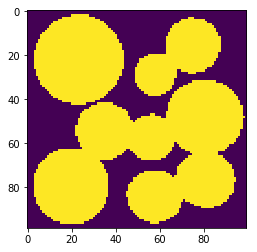

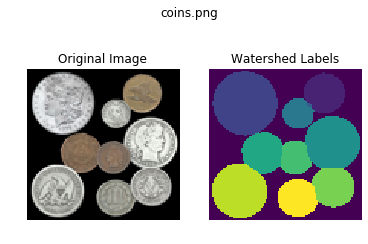

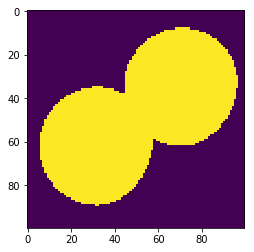

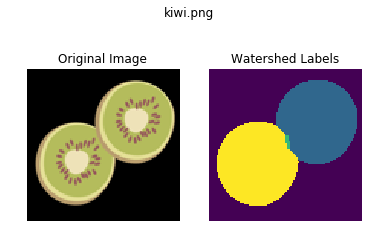

In [10]:
# improve the watershed 
for img_path in ext_images:
    img = Image.open(img_path)
    size_img = img.size
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_size = img.size
    #print(img_size)
    img_size = [img_size[1],img_size[0]]
    
    img_grey = img.convert("L")
    
    img_array = np.array(img_grey)
    
    plt.imshow(img_array)
    
    _, thresh = cv2.threshold(img_array , 0,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)   #use thresh to deal with the picture
    
    #+ cv2.THRESH_OTSU
    
    distance = ndi.distance_transform_edt(thresh)
    
    plt.imshow(thresh)

    peak = peak_local_max(distance,indices=False,labels= thresh)
    markers = ndi.label(peak)[0]
    
    ws_labels = watershed(-distance, markers, mask=img_array)
    
    plot_one_images(img_path, img, "Original Image",ws_labels, "Watershed Labels")

    if img_path == "kiwi.png":
        plt.imsave("kiwi_w.jpg", ws_labels)
    else:
        plt.imsave("coins_w.jpg", ws_labels)
        